<a class="anchor" id="0"></a>
# **Feature Selection for Machine Learning**

This kernel is based on Soledad Galli's course - [Feature Selection for Machine Learning](https://www.udemy.com/course/feature-selection-for-machine-learning/)

## **Feature selection**

- **Feature selection** or **variable selection** is the process of selecting a subset of relevant features or variables from the total features of a level in a data set to build machine learning algorithms. 


### **Advantages of selecting features**

- There are various advantages of feature selection process. These are as follows:-

  1.	Improved accuracy
  2.    Simple models are easier to interpret.
  3.	Shorter training times
  4.	Enhanced generalization by reducing Overfitting
  5.	Easier to implement by software developers
  6.	Reduced risk of data errors by model use
  7.	Variable redundancy
  8.	Bad learning behaviour in high dimensional spaces

<a class="anchor" id="0.1"></a>
# **Table of Contents**

1.	[Filter Methods](#1)
   - 1.1. [Basic Methods](#1.1)
        - 1.1.1 [Remove Constant Features](#1.1.1)
        - 1.1.2 [Remove Quasi-Constant Features](#1.1.2)
   - 1.2 [Univariate Selection Methods](#1.2)
        - 1.2.1 [SelectKBest](#1.2.1)
        - 1.2.2 [SelectPercentile](#1.2.2)
   - 1.3 [Information Gain](#1.3)
   - 1.4 [Fisher Score (chi-square implementation)](#1.4)
   - 1.5 [ANOVA F-Value for Feature Selection](#1.5)
   - 1.6 [Correlation-Matrix with Heatmap](#1.6)
2.	[Wrapper Methods](#2)

   - 2.1. [Sequential Feature Selection](#2.1)
       - 2.1.1 [Sequential Forward Selection (SFS)](#2.1.1)
       - 2.1.2 [Sequential Backward Elimination (SBS)](#2.1.2)
       - 2.1.3 [Sequential Floating Selection (SFFS and SFBS)](#2.1.3)
       - 2.1.4 [Bidirectional Selection](#2.1.4)
       - 2.1.5 [Exhaustive Feature Selection](#2.1.5)
       - 2.1.6 [Limitations of Step Forward/Backward Selection](#2.1.6)
       - 2.1.7 [Difference between filter and wrapper methods](#2.1.7)
   - 2.2 [Recursive Feature Selection](#2.2)
       - 2.2.1 [Recursive Feature Elimination](#2.2.1)
       - 2.2.2 [Recursive Feature Elimination with Cross-Validation](#2.2.2)
   
3. [Embedded Methods](#3)
   - 3.1 [LASSO Regression](#3.1)
   - 3.2 [Random Forest Importance](#3.2)
4. [How to choose the right feature selection method](#4)
5. [Tips and tricks for feature selection](#5)   
6. [References](#6)

# **1. Filter Methods** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


- Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. The characteristics of these methods are as follows:-

  - These methods rely on the characteristics of the data (feature characteristics)
  - They do not use machine learning algorithms.
  - These are model agnostic.
  - They tend to be less computationally expensive.
  - They usually give lower prediction performance than wrapper methods.
  - They are very well suited for a quick screen and removal of irrelevant features.
  
  
 - Filter methods consists of various techniques as given below:-

   -  1.1.    Basic methods
   -  1.2.    Univariate feature selection
   -  1.3.    Information gain
   -  1.4.    Fischer score
   -  1.5.    ANOVA F-Value for Feature Selection
   -  1.6.    Correlation Matrix with Heatmap  
  
- Filter methods can be explained with the help of following graphic:

![FilterMethods](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537552825/Image3_fqsh79.png)


### Image source : AnalyticsVidhya

## **1.1 Basic methods** <a class="anchor" id="1.1"></a>

[Table of Contents](#0.1)


- Under basic methods, we remove constant and quasi-constant features.

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def load_santander():
    # import the Santander customer satisfaction dataset from Kaggle
    X_train = pd.read_csv('dataset/train.csv')
    y_train = X_train.TARGET
    X_train = X_train.drop(columns=['TARGET'])

    X_test = pd.read_csv('dataset/test.csv')
    
    return X_train, y_train, X_test

X_train, y_train, X_test = load_santander()
# check shape of training and test sets
print(f'training shape : {X_train.shape} Test shape : {X_test.shape} y_train shape : {y_train.shape}')

training shape : (76020, 370) Test shape : (75818, 370) y_train shape : (76020,)


## **1.1.1 Remove constant features** <a class="anchor" id="1.1.1"></a>

[Table of Contents](#0.1)

- Constant features are those that show the same value, just one value, for all the observations of the dataset. This is, the same value for all the rows of the dataset. These features provide no information that allows a machine learning model to discriminate or predict a target.

- Identifying and removing constant features, is an easy first step towards feature selection and more easily interpretable machine learning models. To identify constant features, we can use the VarianceThreshold function from sklearn.

- I will demonstrate how to identify constant features using the Santander Customer Satisfaction dataset from Kaggle.

### **Using variance threshold from sklearn**

- Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

In [18]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [9]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [10]:
# It shows what feature are selected!
sum(sel.get_support())

336

- We can see that there are 51 columns / variables that are constant. This means that 51 variables show the same value, just one value, for all the observations of the training set.
- We can see how by removing constant features, we managed to reduced the feature space quite a bit.

In [11]:
# we can then drop these columns from the train and test sets
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [12]:
# check the shape of training and test set
X_train.shape, X_test.shape

((76020, 336), (75818, 336))

In [20]:
X_train.columns[~sel.get_support()]

Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3',
       'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3',
       'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3'],
      dtype='object')

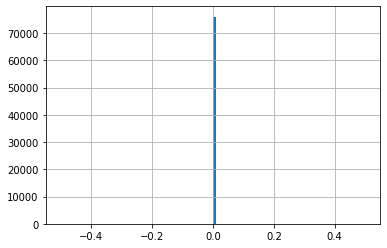

In [21]:
X_train['ind_var2_0'].hist(bins=100)

In [29]:
for i in X_train.columns[~sel.get_support()]:
    print(X_train[i].unique())


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


## **1.1.2 Remove quasi-constant features** <a class="anchor" id="1.1.2"></a>

[Table of Contents](#0.1)

- Quasi-constant features are those that show the same value for the great majority of the observations of the dataset. In general, these features provide little if any information that allows a machine learning model to discriminate or predict a target. But there can be exceptions. So we should be careful when removing these type of features. Identifying and removing quasi-constant features, is an easy first step towards feature selection and more easily interpretable machine learning models.

- To identify quasi-constant features, we can once again use the VarianceThreshold function from sklearn.

- Here I will demonstrate how to identify quasi-constant features using the Santander Customer Satisfaction dataset.

- This method can be used for un-supervised learning since it does not use label for elimination!

### **Removing quasi-constant features**

#### **Using variance threshold from sklearn**

- Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

- Here, I will change the default threshold to remove almost / quasi-constant features.

In [30]:
X_train, y_trian, X_test = load_santander()

In [31]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [32]:
# get_support is a boolean vector that indicates which features 
# are retained. If we sum over get_support, we get the number
# of features that are not quasi-constant
sum(sel.get_support())

273

In [36]:
# name of features!
X_train.columns[sel.get_support()]

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=273)

- We can see that 107 columns / variables are almost constant. This means that 107 variables show predominantly one value for ~99% the observations of the training set.

In [47]:
X_train['ind_var31'].value_counts()

0    75741
1      279
Name: ind_var31, dtype: int64

In [37]:
# percentage of observations showing each of the different values
X_train['ind_var31'].value_counts() / np.float(len(X_train))

0    0.99633
1    0.00367
Name: ind_var31, dtype: float64

- We can see that > 99% of the observations show one value, 0. Therefore, this feature is almost constant.

In [38]:
# we can then remove the features from training and test set
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [39]:
# check the shape of training and test set
X_train.shape, X_test.shape

((76020, 273), (75818, 273))

- By removing constant and quasi-constant features, we reduced the feature space from 370 to 263. We can see that more than 100 features were removed from the present dataset.

## **1.2 Univariate selection methods** <a class="anchor" id="1.2"></a>

[Table of Contents](#0.1)


- Univariate feature selection methods works by selecting the best features based on univariate statistical tests like ANOVA. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method.

- The methods based on F-test estimate the degree of linear dependency between two random variables. They assume a linear relationship between the feature and the target. These methods also assume that the variables follow a Gaussian distribution.

- There are 4 methods that fall under this category :-

  1. SelectKBest
  2. SelectPercentile
  3. SelectFpr, SelectFdr, or family wise error SelectFwe
  4. GenericUnivariateSelection
  
Source : https://scikit-learn.org/stable/modules/feature_selection.html


- Here, I will limit the discussion to SelectKBest and SelectPercentile, because these two are most commonly used in practice.

## **1.2.1 SelectKBest** <a class="anchor" id="1.2.1"></a>

[Table of Contents](#0.1)

- This method select features according to the k highest scores.

- For instance, we can perform a chi-square test to the samples to retrieve only the two best features from iris dataset as follows:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [40]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
X_train, y_trian, X_test = load_santander()

In [42]:
# select the two best features
sel_kbest = SelectKBest(f_classif, k=5)
X_new = sel_kbest.fit_transform(X_train, y_train)
X_new.shape

(76020, 5)

In [43]:
sel_kbest.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [44]:
# Selected best k Features
X_train.columns[sel_kbest.get_support()]

Index(['ind_var5', 'ind_var30', 'num_var30', 'num_var42',
       'num_meses_var5_ult3'],
      dtype='object')

## **1.2.2 SelectPercentile** <a class="anchor" id="1.2.2"></a>

[Table of Contents](#0.1)


- Select features according to a percentile of the highest scores.

Source : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile

In [45]:
from sklearn.feature_selection import SelectPercentile, chi2, f_classif, mutual_info_classif
X_train, y_trian, X_test = load_santander()

In [47]:
# now select features based on top 10 percentile
sel_percent = SelectPercentile(f_classif, percentile=20)
X_new = sel_percent.fit_transform(X_train, y_train)
X_new.shape

(76020, 74)

- We can see that only 37 features lie on the top 10 percentile and hence we select them accordingly.

In [48]:
# Selected best 10 percentile Features
X_train.columns[sel_percent.get_support()]

Index(['var15', 'imp_op_var40_efect_ult3', 'imp_op_var41_efect_ult1',
       'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
       'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3',
       'imp_op_var39_ult1', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var8',
       'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0',
       'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13', 'ind_var14_0',
       'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_cte',
       'ind_var25_0', 'ind_var25', 'ind_var30', 'ind_var39_0', 'ind_var41_0',
       'num_var4', 'num_var5_0', 'num_var5', 'num_var8_0', 'num_var8',
       'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0',
       'num_var13_corto', 'num_var13', 'num_var24_0', 'num_var24',
       'num_var30_0', 'num_var30', 'num_var35', 'num_var39_0', 'num_var41_0',
       'num_var42', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13',
       'saldo_var24', 'saldo_var30', 'saldo_var42', 'var36',
       'imp_aport_var1

## **Important information**

- These objects take as input a scoring function that returns univariate scores and p-values (or only scores for [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) and [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile):


- For regression tasks: [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression), [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression)

- For classification tasks: [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), 
[f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif), [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

## **Feature selection with sparse data**

- If you use sparse data (i.e. data represented as sparse matrices), [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression), [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif) will deal with the data without making it dense.


Source : https://scikit-learn.org/stable/modules/feature_selection.html

## **Warning** 
- Beware not to use a regression scoring function with a classification problem, you will get useless results.

## **1.3 Information Gain** <a class="anchor" id="1.3"></a>

[Table of Contents](#0.1)


- **Information gain** or **mutual information** measures how much information the presence/absence of a feature contributes to making the correct prediction on the target.


- In terms of  [wikipedia](https://en.wikipedia.org/wiki/Mutual_information):


   - **Mutual information measures the information that X and Y share: It measures how much knowing one of these        variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does        not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if      X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X        is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual          information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X).            Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special          case of this is when X and Y are the same random variable.)**


## **mutual_info_classif**


- It estimates mutual information for a discrete target variable.

- Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. 

- This function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

- It can be used for univariate features selection.

- Source : 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

## **mutual_info_regression**

- Estimate mutual information for a continuous target variable.

- Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

- The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

- It can be used for univariate features selection

- Source : 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression

## **1.4 Fisher Score (chi-square implementation)** <a class="anchor" id="1.4"></a>

[Table of Contents](#0.1)

- It is the **chi-square implementation** in scikit-learn. It computes chi-squared stats between each non-negative feature and class.

- This score should be used to evaluate categorical variables in a classification task. It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories. 


In [50]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_iris

In [51]:
iris = load_iris()

# create features and target
X = iris.data
y = iris.target

# convert to categorical data by converting data to integers
X = X.astype(int)

In [52]:
# Compare Chi-Squared Statistics
# select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

In [53]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


- We can see that the above code helps us to select the 2 best features based on Fisher score.

## **1.5 ANOVA F-value For Feature Selection**  <a class="anchor" id="1.5"></a>

[Table of Contents](#0.1)


- Compute the ANOVA F-value for the provided sample.

- If the features are categorical, we will calculate a chi-square statistic between each feature and the target vector. 
However, if the features are quantitative, we will compute the ANOVA F-value between each feature and the target vector.

- The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different.

In [54]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
X_train, y_trian, X_test = load_santander()

In [55]:
# select the two best features
sel_kbest = SelectKBest(f_classif, k=15)
X_new = sel_kbest.fit_transform(X_train, y_train)

In [56]:
#sel_kbest.scores_

In [57]:
# View results
print('Original number of features:', X_train.shape[1])
print('Reduced number of features:', X_new.shape[1])

Original number of features: 370
Reduced number of features: 15


## **1.6 Correlation-Matrix with Heatmap** <a class="anchor" id="1.6"></a>

[Table of Contents](#0.1)


- **Correlation** is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other.

- **Good variables are highly correlated with the target**.

- Correlated predictor variables provide redundant information.

- **Variables should be correlated with the target but uncorrelated among themselves**.


- Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: 

   - "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".
   
   
- In this section,  I will demonstrate how to select features based on correlation between two features. We can find features that are correlated with each other. By identifying these features, we can then decide which features we want to keep, and which ones we want to remove.


- Using Pearson correlation our returned coefficient values will vary between -1 and 1.

- If the correlation between two features is 0 this means that changing any of these two features will not affect the other.

- If the correlation between two features is greater than 0 this means that increasing the values in one feature will make increase also the values in the other feature (the closer the correlation coefficient is to 1 and the stronger is going to be this bond between the two different features).

- If the correlation between two features is less than 0 this means that increasing the values in one feature will make decrease the values in the other feature (the closer the correlation coefficient is to -1 and the stronger is going to be this relationship between the two different features).

- In this analysis we will check if the selected variables are highly correlated with each other. If they are, we would then need to keep just one of the correlated ones and drop the others.

In [58]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
X_train, y_trian, X_test = load_santander()

In [59]:
# Create correlation matrix
corr_matrix = X_train.corr()
corr_matrix

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-0.006302,-0.006700,-0.006698,...,-0.007631,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687
var3,-0.001025,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,...,0.000229,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071
var15,-0.002135,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,...,0.011623,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497
imp_ent_var16_ult1,-0.003111,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,...,0.007428,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007
imp_op_var39_comer_ult1,-0.001436,0.005989,0.094762,0.041221,1.000000,0.886476,0.342709,0.295295,0.032280,0.054809,...,0.001123,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,-0.003772,0.000617,0.029180,0.002655,0.009445,0.008539,-0.000436,-0.000561,-0.000211,-0.000243,...,0.003708,0.001174,-0.000187,0.003271,0.002914,1.000000,0.332172,0.818300,0.710593,0.002889
saldo_medio_var44_hace3,-0.003674,0.000508,0.018884,-0.000612,0.005532,0.006359,-0.000480,-0.000529,-0.000170,-0.000195,...,-0.000074,-0.000219,-0.000151,-0.000196,-0.000205,0.332172,1.000000,0.229158,0.213191,0.003646
saldo_medio_var44_ult1,-0.000856,0.000738,0.032833,0.005055,0.011665,0.010660,-0.000254,-0.000510,-0.000254,-0.000292,...,0.010993,0.000819,-0.000225,0.002493,0.002205,0.818300,0.229158,1.000000,0.968167,0.003258
saldo_medio_var44_ult3,0.000297,0.000778,0.033597,0.006590,0.010802,0.009822,-0.000372,-0.000601,-0.000268,-0.000308,...,0.009088,0.000977,-0.000238,0.002905,0.002574,0.710593,0.213191,0.968167,1.000000,0.003037


In [60]:
 # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper    

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,NaN,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-0.006302,-0.006700,-0.006698,...,-0.007631,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687
var3,NaN,NaN,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,...,0.000229,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071
var15,NaN,NaN,NaN,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,...,0.011623,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497
imp_ent_var16_ult1,NaN,NaN,NaN,NaN,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,...,0.007428,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007
imp_op_var39_comer_ult1,NaN,NaN,NaN,NaN,NaN,0.886476,0.342709,0.295295,0.032280,0.054809,...,0.001123,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.332172,0.818300,0.710593,0.002889
saldo_medio_var44_hace3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229158,0.213191,0.003646
saldo_medio_var44_ult1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.968167,0.003258
saldo_medio_var44_ult3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003037


In [82]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print(to_drop)

['imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var8', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo', 'ind_var13_medio', 'ind_var13', 'ind_var18', 'ind_var24', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var31', 'ind_var32_0', 'ind_var32', 'ind_var33', 'ind_var34', 'ind_var37_0', 'ind_var37', 'ind_var40_0', 'ind_var40', 'ind_var41_0', 'ind_var39', 'ind_var44', 'num_var1_0', 'num_var1', 'num_var5_0', 'num_var5', 'num_var6_0', 'num_var6', 'num_var8_0', 'num_var8', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13_largo_0', 'num_var13_largo', 'num_var13_medio_0', 'num_var13_medio', 'num_var13', 'num_var14', 'num_var18_0', 'num_var18', 'num_var20_0', 'num_var20', 'num_var24_0', 'num_var24', 'num_var26', 'num_var25_0', 'num_var25', 'num_op_var40_ult3', 'num_op_var41_ult3', 'num_op_var39_hace2', 'num_op_v

In [85]:
# Drop Marked Features
df1 = X_train.drop(columns=to_drop, axis=1)
df1.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var13_largo_hace2', 'saldo_medio_var13_largo_hace3',
       'saldo_medio_var13_medio_hace3', 'saldo_medio_var29_hace2',
       'saldo_medio_var29_hace3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'var38'],
      dtype='object', length=204)

In [84]:
df1

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_medio_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


# comparing Kbest and corrolation matrix features!

In [86]:
# select the two best features
sel_kbest = SelectKBest(mutual_info_classif, k=16)
X_new = sel_kbest.fit_transform(X_train, y_train)

In [66]:
# now select features based on top 10 percentile
sel_percent = SelectPercentile(f_classif, percentile= 55.1)
X_percent = sel_percent.fit_transform(X_train, y_train)
X_percent.shape

(76020, 204)

In [68]:
a = df1.columns.to_numpy()
b = X_train.columns[sel_kbest.get_support()].to_numpy()
c = X_train.columns[sel_percent.get_support()].to_numpy()

In [72]:
common_features = np.intersect1d(a, b)
print(f'Corrolation features {len(a)}')
print(f'Kbest features {len(b)}')
print(f'Common features {len(common_features)}')

Corrolation features 204
Kbest features 15
Common features 9


In [71]:
common_features = np.intersect1d(a, c)
print(f'Corrolation features {len(a)}')
print(f'Kbest features {len(c)}')
print(f'Common features {len(common_features)}')

Corrolation features 204
Kbest features 204
Common features 111


- We can see that we have dropped the third column from the original dataset.

In [87]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 818 kB/s eta 0:00:01


# **2. Wrapper Methods** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


- In wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from the subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

- Some common examples of wrapper methods are 

  - 1. Forward selection, 
  - 2. Backward elimination, 
  - 3. Exhaustive feature selection,
  - 4. Recursive feature elimination.
  - 5. Recursive feature elimination with cross-validation
  
  
- Wrapper methods can be explained with the help of following graphic:


![Wrapper Methods](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png)



### Image source : AnalyticsVidhya

# **2.1 Sequential Feature Selection** <a class="anchor" id="2.1"></a>

## **2.1.1 Sequential Forward Selection (SFS)** <a class="anchor" id="2.1.1"></a>

[Table of Contents](#0.1) 


- Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

- The procedure starts with an empty set of features [reduced set]. The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the set.

- Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. In the second step, it evaluates all possible combinations of the selected feature and a second feature, and selects the pair that produce the best performing algorithm based on the same pre-set criteria.

- The pre-set criteria can be the roc_auc for classification and the r squared for regression for example.


In [6]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [7]:
X_train, y_trian, X_test = load_santander()

In [138]:
# # removed correlated  features
# X_train.drop(labels=corr_features, axis=1, inplace=True)
# X_test.drop(labels=corr_features, axis=1, inplace=True)

# X_train.shape, X_test.shape

In [8]:
X_train.fillna(0, inplace=True)

In [20]:
X_train = X_train.iloc[:10000, :20]
y_train = y_train[:10000]

In [21]:
# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=12, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring='accuracy', # r2
           n_jobs=-1,
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
exception calling callback for <Future at 0x10daa6850 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/celal/opt/anaconda3/envs/phd_analysis/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/celal/opt/anaconda3/envs/phd_analysis/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/Users/celal/opt/anaconda3/envs/phd_analysis/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/Users/celal/opt/anaconda3/envs/phd_analysis/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/celal/opt/anaconda3/envs/phd_analysis/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _di

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [12]:
sfs1.k_feature_idx_

(1, 8, 19, 21, 23, 25, 27, 30, 32, 34, 36, 39)

In [13]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(25,)","[0.013905972527015753, 0.013718479889091584, 0...",0.0119989,"(25,)",0.00577332,0.00256555,0.00181411
2,"(25, 30)","[0.017762936714548205, 0.01965278216441102, 0....",0.0158719,"(25, 30)",0.00919071,0.00408416,0.00288794
3,"(25, 30, 32)","[0.020253516357089385, 0.022870980867819912, 0...",0.0184375,"(25, 30, 32)",0.0102311,0.00454648,0.00321484
4,"(1, 25, 30, 32)","[0.02023550805269614, 0.024006812376604625, 0....",0.0185314,"(1, 25, 30, 32)",0.0119382,0.00530509,0.00375126
5,"(1, 21, 25, 30, 32)","[0.02166100409435545, 0.023753075876580265, 0....",0.0220395,"(1, 21, 25, 30, 32)",0.0028649,0.0012731,0.000900219
6,"(1, 21, 25, 30, 32, 34)","[0.021905495713307133, 0.023780366571690803, 0...",0.0221611,"(1, 21, 25, 30, 32, 34)",0.00277053,0.00123117,0.000870565
7,"(1, 21, 25, 30, 32, 34, 39)","[0.021509096672572947, 0.02355552508316905, 0....",0.0217535,"(1, 21, 25, 30, 32, 34, 39)",0.00311095,0.00138244,0.000977535
8,"(1, 19, 21, 25, 30, 32, 34, 39)","[0.022089576553301793, 0.023697978089996186, 0...",0.0222841,"(1, 19, 21, 25, 30, 32, 34, 39)",0.00243888,0.00108379,0.000766355
9,"(1, 19, 21, 23, 25, 30, 32, 34, 39)","[0.021837858336232085, 0.023807091421317317, 0...",0.021896,"(1, 19, 21, 23, 25, 30, 32, 34, 39)",0.00345914,0.00153717,0.00108694
10,"(1, 19, 21, 23, 25, 30, 32, 34, 36, 39)","[0.021555885548152243, 0.024098695893436495, 0...",0.021601,"(1, 19, 21, 23, 25, 30, 32, 34, 36, 39)",0.00454842,0.00202122,0.00142922


In [14]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

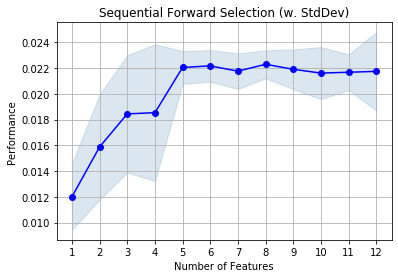

In [15]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [23]:
X_train.columns[list(sfs1.k_feature_idx_)]

TypeError: 'NoneType' object is not iterable

- We can see that forward feature selection results in the above columns being selected from all the given columns.

## **2.1.2 Sequential Backward Elimination (SBS)** <a class="anchor" id="2.1.2"></a>

[Table of Contents](#0.1) 


- In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

- The procedure starts with the full set of attributes. At each step, it removes the worst attribute remaining in the set.


In [24]:
# step backward feature elimination

sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   13.3s finished

[2020-04-29 17:58:32] Features: 19/10 -- score: -0.11590889817655962[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   11.3s finished

[2020-04-29 17:58:43] Features: 18/10 -- score: -0.04251083277553428[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    9.8s finished

[2020-04-29 17:58:53] Features: 17/10 -- score: -0.03187688786864359[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)

In [27]:
sfs1.k_feature_idx_

(1, 3, 4, 5, 10, 11, 13, 14, 16, 17)

In [28]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['var3', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_ult1',
       'imp_op_var41_comer_ult1', 'imp_op_var41_efect_ult1',
       'imp_op_var41_efect_ult3', 'imp_op_var39_efect_ult1',
       'imp_op_var39_efect_ult3'],
      dtype='object')

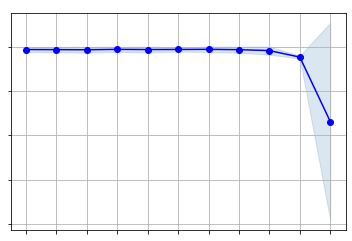

In [34]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

- So, backward feature elimination results in the following columns being selected.

## **2.1.3 Sequential Floating (SFFS and SFBS)** <a class="anchor" id="2.1.2"></a>
- For both backward and forward selection, sequential floating is an extension to LRS. Rather than choosing values for L and R to add and remove features, we determine this from the data directly.
- During the search, the size of the subset will be floating up and down since we are adding and removing features.
- How it works
    - Step floating forward selection: After each forward step, SFFS performs backward steps as long as the objective function increases.
    - Step floating backward selection: After each backward step, SFBS performs forward steps as long as the objective function increases.
    

- Here’s a detailed explanation of how SFFS works in practice:
    * Start from an empty set.
    * Select the best feature as we usually do in SFS and add it.
    * Then select the worst feature from this subset.
    * Evaluate and check whether the objective function improves or not by deleting this feature. If it’s improving, we delete this feature; otherwise, we keep it.
    * Repeat from step 2 until the stop criterion is reached.

## **2.1.4 Bidirectional Search (BDS)** <a class="anchor" id="2.1.4"></a>

BDS applies SFS and SBS concurrently—SFS is performed from the empty set of features and SBS is performed from the full set of features.
But this can lead to an issue of converging to a different solution. To avoid this and to guarantee SFS and SBS converge to the same solution, we make the following constraints:
Features already selected by SFS are not removed by SBS.
Features already removed by SBS are not added by SFS.

## **2.1.5 Exhaustive Feature Selection** <a class="anchor" id="2.1.5"></a>

[Table of Contents](#0.1) 


- In an exhaustive feature selection the best subset of features is selected, over all possible feature subsets, by optimizing a specified performance metric for a certain machine learning algorithm. For example, if the classifier is a logistic regression and the dataset consists of 4 features, the algorithm will evaluate all 15 feature combinations as follows:

  - all possible combinations of 1 feature
  - all possible combinations of 2 features
  - all possible combinations of 3 features
  - all the 4 features
  
  
and select the one that results in the best performance (e.g., classification accuracy) of the logistic regression classifier.

- This is another greedy algorithm as it evaluates all possible feature combinations. It is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

- There is a special package for python that implements this type of feature selection: mlxtend.

- In the mlxtend implementation of the exhaustive feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features.

- This is somewhat arbitrary because we may be selecting a subopimal number of features, or likewise, a high number of features.

## **2.1.6 Limitations of Step Forward/Backward Selection** <a class="anchor" id="2.1.6"></a>

[Table of Contents](#0.1) 
- Besides the drawbacks of computation costs, there are some other points to pay attention to when working with SFS & SBS:
- Since we know that SFS adds features at each iteration, a problem can occur when we add up a feature that was useful in the beginning, but after adding more ones, is now non-useful. At this point, there’s no way to remove this kind of feature.
- The same thing happens to SBS but in the reverse direction—this is because of the inability of SBS to see the usefulness of a feature after being removed from the feature set.
- For those reasons, and for more generalization for SBS and SFS, there are two methods that can solve such an issue: LRS and sequential floating.

## **2.1.7 Difference between filter and wrapper methods** <a class="anchor" id="2.1.7"></a>
[Table of Contents](#0.1) 

- Filter methods do not incorporate a machine learning model in order to determine if a feature is good or bad whereas wrapper methods use a machine learning model and train it the feature to decide if it is essential or not.
- Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally costly, and in the case of massive datasets, wrapper methods are not the most effective feature selection method to consider.
- Filter methods may fail to find the best subset of features in situations when there is not enough data to model the statistical correlation of the features, but wrapper methods can always provide the best subset of features because of their exhaustive nature.
- Using features from wrapper methods in your final machine learning model can lead to overfitting as wrapper methods already train machine learning models with the features and it affects the true power of learning. But the features from filter methods will not lead to overfitting in most of the cases
- So far you have studied the importance of feature selection, understood its difference with dimensionality reduction. You also covered various types of feature selection methods. So far, so good!


# **2.2 Recursive Feature Selection** <a class="anchor" id="2.2"></a>


## **2.2.1 Recursive Feature elimination** <a class="anchor" id="2.2.1"></a>

[Table of Contents](#0.1) 


- It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

- Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for 2N combinations of features.

- Source : https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py

## **2.2.2 Recursive Feature Elimination with Cross-Validation** <a class="anchor" id="2.2.2"></a>

[Table of Contents](#0.1) 


- **Recursive Feature Elimination with Cross-Validated (RFECV)** feature selection technique selects the best subset of features for the estimator by removing 0 to N features iteratively using recursive feature elimination.

- Then it selects the best subset based on the accuracy or cross-validation score or roc-auc of the model. Recursive feature elimination technique eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features.

- Please see my kernel - [Extensive Analysis - EDA + FE + Modelling : Section 19 Recursive FeaTure Elimination with Cross-Validation](https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling)

- Source : https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

# **3. Embedded Methods** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


- Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

- This is why Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

- Some of the most popular examples of these methods are LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting.

- Embedded methods can be explained with the help of following graphic:


![Embedded Methods](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Embedded_1.png)


### Image source : AnalyticsVidhya

## **3.1 ** LASSO Regression<a class="anchor" id="3.1"></a>

[Table of Contents](#0.1)


- Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.

- Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularisation, Lasso or l1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

- I will demonstrate how to select features using the Lasso regularisation on the House Price dataset from Kaggle.

In [ ]:
#load libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [ ]:
# load dataset
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data.shape

In [ ]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
# the features in the house dataset are in very
# different scales, so it helps the regression to scale them

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

In [ ]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

In [ ]:
sel_.get_support()

In [ ]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

- We can see that Lasso regularisation helps to remove non-important features from the dataset. So, increasing the penalisation will result in increase the number of features removed. Therefore, we need to keep an eye and monitor that we don't set a penalty too high so that to remove even important features, or too low and then not remove non-important features.

- If the penalty is too high and important features are removed, we will notice a drop in the performance of the algorithm and then realise that we need to decrease the regularisation.

## **3.2 ** Random Forest Importance<a class="anchor" id="3.2"></a>

[Table of Contents](#0.1)

- Random forests are one the most popular machine learning algorithms. They are so successful because they provide in general a good predictive performance, low overfitting and easy interpretability. This interpretability is given by the fact that it is straightforward to derive the importance of each variable on the tree decision. In other words, it is easy to compute how much each variable is contributing to the decision.

- Random forests consist of 4-12 hundred decision trees, each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations, and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a sequence of yes-no questions based on a single or combination of features. At each node (this is at each question), the three divides the dataset into 2 buckets, each of them hosting observations that are more similar among themselves and different from the ones in the other bucket. Therefore, the importance of each feature is derived by how "pure" each of the buckets is.

- For classification, the measure of impurity is either the Gini impurity or the information gain/entropy. For regression the measure of impurity is variance. Therefore, when training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.

- To give a better intuition, features that are selected at the top of the trees are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.

- Please see my kernel, [Random Forest Classifier + Feature Importance - Section 13. Find important features with Random Forest model](https://www.kaggle.com/prashant111/random-forest-classifier-feature-importance) to know how to find important features using the random forest model.

- I will demonstrate this process using the mushroom classification dataset as follows:-

In [ ]:
# Import libraries
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load dataset
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

In [ ]:
# Declare feature vector and target variable
X = df.drop(['class'], axis = 1)
y = df['class']

In [ ]:
# Encode categorical variables
X = pd.get_dummies(X, prefix_sep='_')
y = LabelEncoder().fit_transform(y)

In [ ]:
# Normalize feature vector
X2 = StandardScaler().fit_transform(X)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 0)

In [ ]:

# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


In [ ]:
# fit the classifier to the training set
clf.fit(X_train, y_train)

In [ ]:
# predict on the test set
y_pred = clf.predict(X_test)

## **Feature Importance**

- Decision Trees models which are based on ensembles (eg. Extra Trees and Random Forest) can be used to rank the importance of the different features. Knowing which features our model is giving most importance can be of vital importance to understand how our model is making it’s predictions (therefore making it more explainable). At the same time, we can get rid of the features which do not bring any benefit to our model.

In [ ]:
# visualize feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(7).plot(kind='barh')

- Now we know which features are most important in the Random Forest model, we can train our model just using these features. 

- I have implemented this in the kernel - [Random Forest Classifier + Feature Importance : Section 15 - Build the Random Forest model on selected features](https://www.kaggle.com/prashant111/random-forest-classifier-feature-importance). It resulted in improved accuracy.

# **4. How to choose the right feature selection method** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)


- We can see that there are lot of feature selection techniques available. 

- The following graphic will serve as a guide on how to choose a feature selection method:-

![How to Choose a Feature Selection Method](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png)


## **Image Source : Machine Learning Mastery**

## **Numerical Input, Numerical Output**

- This is a regression predictive modeling problem with numerical input variables.

- The most common techniques are to use a correlation coefficient, such as Pearson’s for a linear correlation, or rank-based methods for a nonlinear correlation.

- The tests emplyed are as follows:-

  - Pearson’s correlation coefficient (linear).
  - Spearman’s rank coefficient (nonlinear)
  
  
## **Numerical Input, Categorical Output**

- This is a classification predictive modeling problem with numerical input variables.

- This might be the most common example of a classification problem,

- Again, the most common techniques are correlation based, although in this case, they must take the categorical target into account.

- We can employ the following tests as follows:-

  - ANOVA correlation coefficient (linear).
  - Kendall’s rank coefficient (nonlinear).
  
- Kendall does assume that the categorical variable is ordinal.


## **Categorical Input, Numerical Output**

- This is a regression predictive modeling problem with categorical input variables.

- This is a strange example of a regression problem (e.g. we will not encounter it often).

- We can use the same “Numerical Input, Categorical Output” methods (described above), but in reverse.




## **Categorical Input, Categorical Output**

- This is a classification predictive modeling problem with categorical input variables.

- The most common correlation measure for categorical data is the chi-squared test. We can also use mutual information (information gain) from the field of information theory.

- The following tests can be employed in this case -

  - Chi-Squared test (contingency tables).
  - Mutual Information.
  
In fact, mutual information is a powerful method that may prove useful for both categorical and numerical data, e.g. it is agnostic to the data types.

# **5. Tips and Tricks for Feature Selection** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


- In this section, we provide some additional considerations when using filter-based feature selection.


## **Correlation Statistics**

- The scikit-learn library provides an implementation of most of the useful statistical measures.

- For example:

   - Pearson’s Correlation Coefficient: [f_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)
   - ANOVA: [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html)
   - Chi-Squared: [chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)
   - Mutual Information: [mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) and [mutual_info_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html).
   
   
- Also, the SciPy library provides an implementation of many more statistics, such as Kendall’s tau (kendalltau) and Spearman’s rank correlation (spearmanr).


## **Selection Method**

- The scikit-learn library also provides many different filtering methods once statistics have been calculated for each input variable with the target.

- Two of the more popular methods include:

    - Select the top k variables: [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)
    - Select the top percentile variables: [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html)
    


## **Transform Variables**

- We can consider transforming the variables in order to access different statistical methods. For example, we can transform a categorical variable to ordinal, even if it is not, and see if any interesting results come out.

- We can also make a numerical variable discrete (e.g. bins); try categorical-based measures.

- Some statistical measures assume properties of the variables, such as Pearson’s that assumes a Gaussian probability distribution to the observations and a linear relationship. You can transform the data to meet the expectations of the test and try the test regardless of the expectations and compare results.


## **What Is the Best Method?**

- There is no best feature selection method. Just like there is no best set of input variables or best machine learning algorithm. 

- Instead, we must discover what works best for your specific problem using careful systematic experimentation.

- We should try a range of different models fit on different subsets of features chosen via different statistical measures and discover what works best for your specific problem.


## **4 best ways of Feature Selection**

- The 4 practical ways of feature selection which yield best results are as follows:-

    1. SelectKBest
    2. Recursive Feature Elimination
    3. Correlation-matrix with heatmap
    4. Random-Forest Importance

# **6. References** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


- The work done in this kernel is inspired from the following courses and websites:-


  1. [Feature Selection for Machine Learning](https://www.udemy.com/course/feature-selection-for-machine-learning/) by Soledad Galli

  2. [Analytics Vidhya article on Feature Selection](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)

  3. https://en.wikipedia.org/wiki/Feature_selection

  4. https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

[Go to Top](#0)